<a href="https://colab.research.google.com/github/julmiha25-sys/Python/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D1%82%D0%B8%D0%BA%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D1%84%D0%BE%D1%80%D0%BC%D1%8B/%D0%A3%D1%81%D0%BF%D0%B5%D1%88%D0%BD%D1%8B%D0%B5_%D0%BF%D1%80%D0%BE%D0%B4%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F_%D0%BF%D0%BE_%D0%B4%D0%BD%D1%8F%D0%BC_%D0%BD%D0%B5%D0%B4%D0%B5%D0%BB%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Количество обновлений подписки по дням недели:
Понедельник: 136
Вторник: 144
Среда: 162
Четверг: 169
Пятница: 145
Суббота: 135
Воскресенье: 143

 Сохранение результатов в файл weekdays.txt...
Файл сохранен: weekdays.txt


[Text(136, 0, '135'),
 Text(137, 1, '136'),
 Text(144, 2, '143'),
 Text(145, 3, '144'),
 Text(146, 4, '145'),
 Text(163, 5, '162'),
 Text(170, 6, '169')]

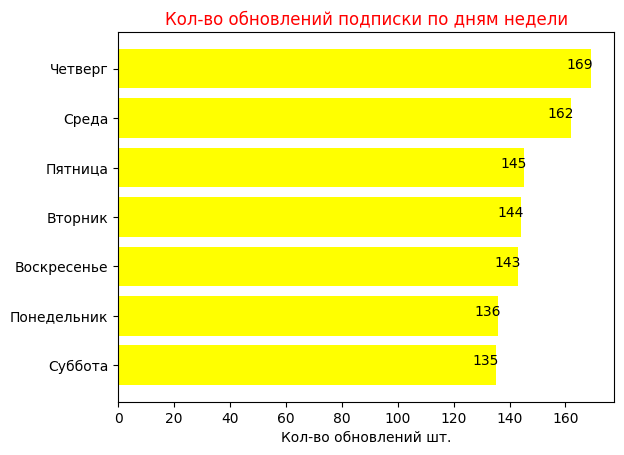

In [16]:
import os
from datetime import datetime
import re # Регулярные выражения
from collections import Counter

def sub_renewal_by_day(file_path):
  if not os.path.exists(file_path):
    print(f"❌ Файл не найден: {file_path}")
    return None
  with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
  print("Количество обновлений подписки по дням недели:")
  res=Counter(     # Подсчет кол-ва вхождений
        ["понедельник", "вторник", "среда", "четверг", "пятница", "суббота", "воскресенье"]
        [datetime.strptime(match.group(1), "%Y-%m-%d").weekday()] # Группировка по дате
        for current, next_line in zip(lines, lines[1:] + ['']) # Смотрим текущую строку и следующую
        if (current.strip().startswith("INFO") and
            'Обновляем подписку' in current.strip() and
            not next_line.strip().startswith("ERROR") and
            (match := re.search(r'(\d{4}-\d{2}-\d{2}) \d{2}:\d{2}:\d{2},\d{3}', current.strip()))) # Поиск даты не None
    )
  print("\n".join(f"{day.capitalize()}: {res.get(day, 0)}"
                    for day in ["понедельник", "вторник", "среда", "четверг",
                               "пятница", "суббота", "воскресенье"]))

  filename = 'weekdays.txt' # Выходной файл
  print(f"\n Сохранение результатов в файл {filename}...")
  with open(filename, 'w', encoding='utf-8') as f:
    f.write("Количество обновлений подписки по дням недели:\n")
    f.write("\n".join(f"{day.capitalize()}: {res.get(day, 0)}" # Первая буква строки - заглавная, сортировка по дню недели
        for day in ["понедельник", "вторник", "среда", "четверг", "пятница", "суббота", "воскресенье"]))
  print(f"Файл сохранен: {filename}")
  return

sub_renewal_by_day('auto_purchase.log')

# Визуализация
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_table('weekdays.txt',sep=':',header=None,skiprows=1,names=['object','value'])
df=df.sort_values('value')
plt.barh(df['object'],df['value'],color='yellow')
plt.title('Кол-во обновлений подписки по дням недели',color='red')
plt.xlabel('Кол-во обновлений шт.')
[plt.text(v+1,i,str(v),ha='right') for i,v in enumerate(df['value'])]
